In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,25)
import contextily as cx
import numpy as np


In [33]:
gdf = pd.read_csv('../data/570_trafikkulykke-eksport.csv', delimiter = ';',low_memory=False)

In [4]:
kolonner_i_datasettet = gdf.columns.values.tolist()
print(kolonner_i_datasettet)

['VEGOBJEKT-ID', 'TYPE-ID', 'VERSJON', 'FØRSTE FOREKOMST', 'STARTDATO', 'SLUTTDATO', 'SIST MODIFISERT', 'ALTERNATIV UHELLSKODE', 'ALVORLIGHETSGRAD', 'ANMELDELSESNUMMER', 'ANTALL ALVORLIG SKADET (STK)', 'ANTALL ANDRE ENHETER (NY) (STK)', 'ANTALL BUSS (NY) (STK)', 'ANTALL DREPTE I ULYKKEN (STK)', 'ANTALL ENHETER (STK)', 'ANTALL FOTGJENGERE (NY) (STK)', 'ANTALL KJØREFELT (STK)', 'ANTALL LASTEBIL (NY) (STK)', 'ANTALL LETT MC (NY) (STK)', 'ANTALL LETTERE SKADET (STK)', 'ANTALL MC (NY) (STK)', 'ANTALL MEGET ALVORLIG SKADET (STK)', 'ANTALL MOPED (NY) (STK)', 'ANTALL PERSONBIL (NY) (STK)', 'ANTALL SKINNEGÅENDE MATERIELL (NY) (STK)', 'ANTALL SYKKEL (NY) (STK)', 'ANTALL TRAKTOR (NY) (STK)', 'ANTALL UKJENTE ENHETER (NY) (STK)', 'ANTALL VAREBIL (NY) (STK)', 'ATK, INFLUENSSTREKNING (NY)', 'BESKRIVELSE', 'DEKKETYPE', 'FARTSDEMPENDE TILTAK (NY)', 'FARTSGRENSE (KM/H)', 'FORSTERKET VEGOPPMERKING', 'FYLKENAVN (NY)', 'FYLKENUMMER (NY)', 'FØREFORHOLD', 'GEOMETRI, PUNKT', 'HISTORISK ARM (NY)', 'HISTORISK H

In [5]:
gdf['ÅR (NY)'].describe()

count    290392.000000
mean       1997.979114
std          11.067840
min        1977.000000
25%        1989.000000
50%        1998.000000
75%        2007.000000
max        2020.000000
Name: ÅR (NY), dtype: float64

In [32]:
gs = geopandas.GeoSeries.from_wkt(gdf['GEOMETRI'])
#Lager geometri kolonne og setter riktig referansesystem
gdf = geopandas.GeoDataFrame(gdf, geometry=gs, crs="EPSG:5973")
# Konverterer koordinatene til samme format som kartet som vi henter eksternt
gdf = gdf.to_crs(epsg=3857)
# Sletter dataframes for å frigjør plass i minne
#del(df)
del(gs)
#ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#cx.add_basemap(ax)

KeyboardInterrupt: 

<AxesSubplot:xlabel='FARTSGRENSE (KM/H)'>

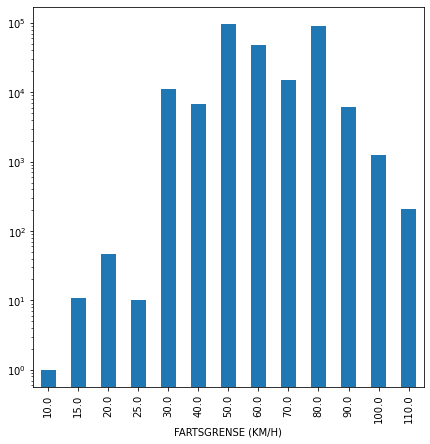

In [7]:
gdf_guppert_fartsgrense = gdf.groupby("FARTSGRENSE (KM/H)")["VEGOBJEKT-ID"].count()
#Plotter men på logaritmisk skala
gdf_guppert_fartsgrense.plot(kind='bar',figsize=(7,7), logy=True)

<AxesSubplot:ylabel='Frequency'>

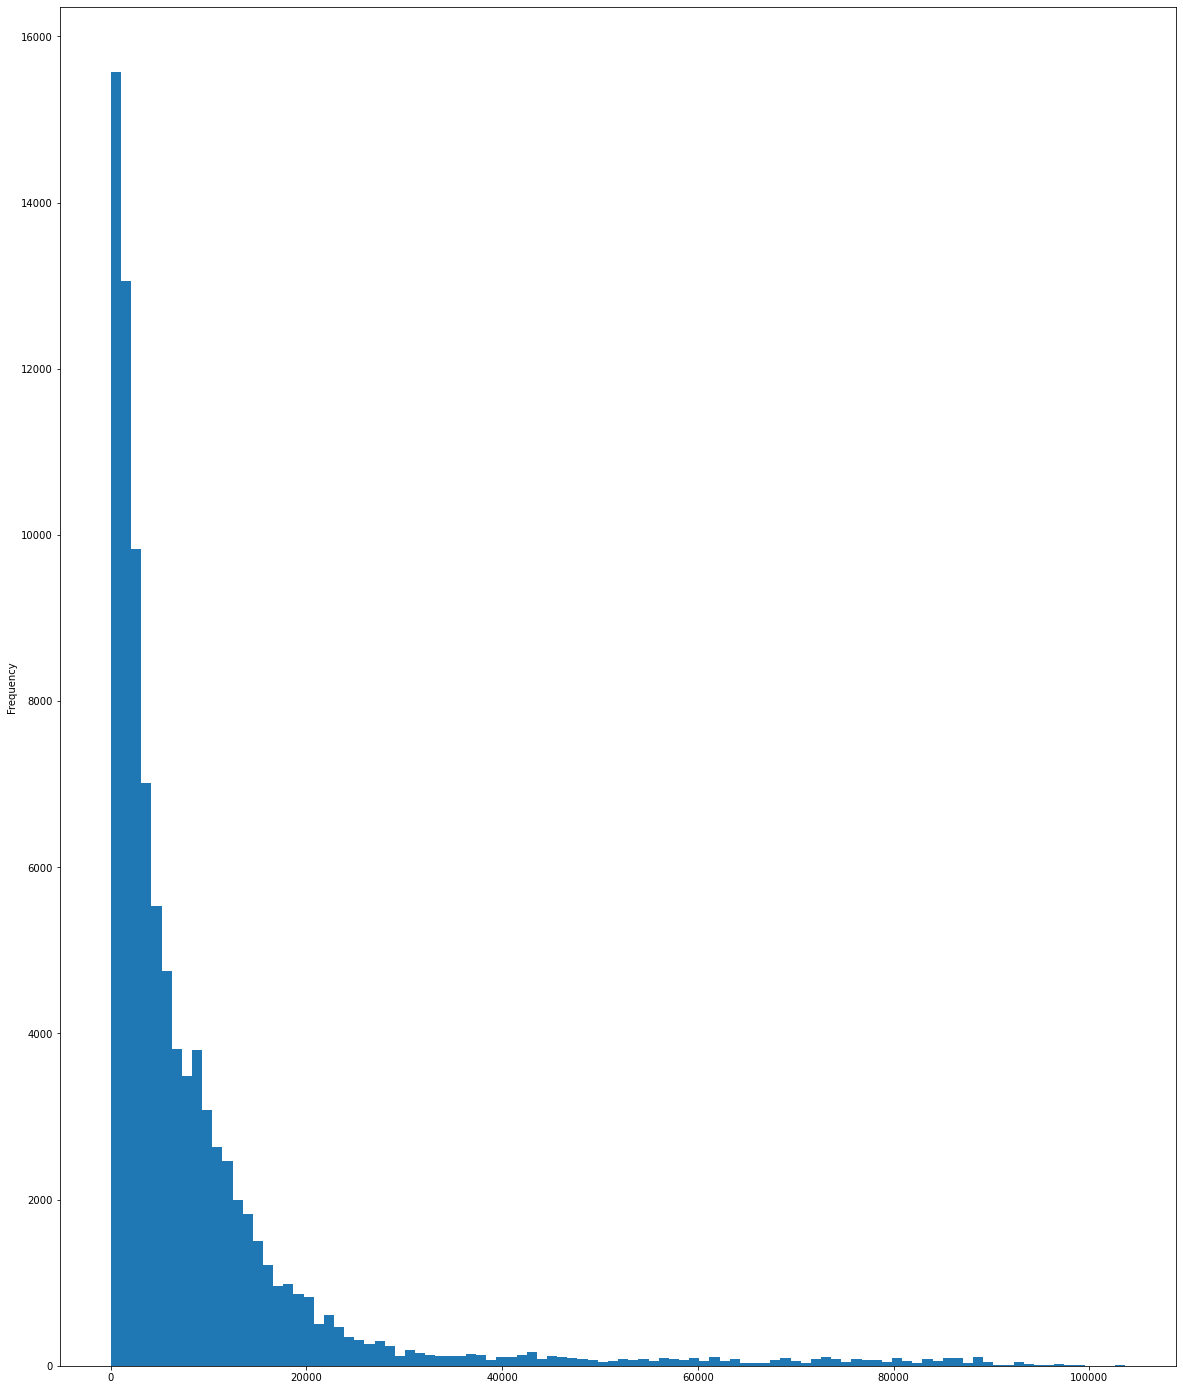

In [8]:
gdf["ÅDT (NY)"].plot(kind="hist", bins=100)

In [9]:
gdf["ÅDT (NY)"][gdf["ÅDT (NY)"]<100]

gdf["ÅDT (NY)"].fillna(0, inplace=True)

bins = [0, 100, 250, 1000, 20000]
names = ['Boliggate', 'Landeveg', 'Transportveg', 'Hoytrafikert']
d = dict(enumerate(names, 1))

gdf['AADT range'] = np.vectorize(d.get)(np.digitize(gdf["ÅDT (NY)"], bins))
gdf['AADT range']

0         Transportveg
1         Hoytrafikert
2         Transportveg
3         Transportveg
4         Hoytrafikert
              ...     
290447    Hoytrafikert
290448    Hoytrafikert
290449    Transportveg
290450       Boliggate
290451       Boliggate
Name: AADT range, Length: 290452, dtype: object

<AxesSubplot:xlabel='AADT range,FARTSGRENSE (KM/H)'>

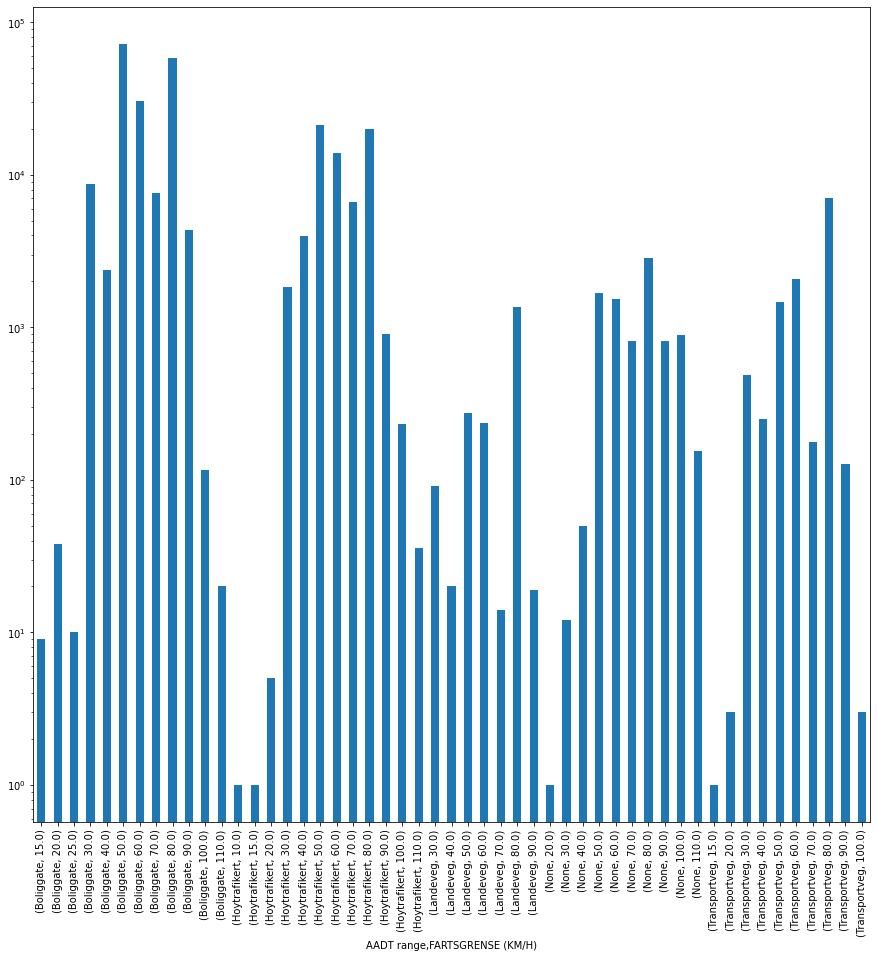

In [10]:
gdf_guppert_fartsgrense = gdf.groupby(['AADT range', "FARTSGRENSE (KM/H)"])["VEGOBJEKT-ID"].count()
#Plotter men på logaritmisk skala
gdf_guppert_fartsgrense.plot(kind='bar',figsize=(15,15), logy=True)

In [11]:
gdf['FØREFORHOLD'].describe()
gdf.groupby('FØREFORHOLD')["VEGOBJEKT-ID"].count()


FØREFORHOLD
Delvis snø / isbelagt veg     17869
Glatt ellers                   4960
Snø / isbelagt veg            40554
Tørr, bar veg                152971
Ukjent                        10947
Våt, bar veg                  62305
Name: VEGOBJEKT-ID, dtype: int64

In [12]:
gdf['LYSFORHOLD'].describe()
gdf.groupby('LYSFORHOLD')["VEGOBJEKT-ID"].count()


LYSFORHOLD
Dagslys                    195184
Mørkt med vegbelysning      45452
Mørkt uten vegbelysning     26429
Tussmørke, skumring         15819
Ukjent                       1953
Name: VEGOBJEKT-ID, dtype: int64

In [13]:

gdf['ANTALL ENHETER (STK)'].describe()
gdf.groupby('ANTALL ENHETER (STK)')["VEGOBJEKT-ID"].count()

ANTALL ENHETER (STK)
1.0      89195
2.0     179731
3.0      17250
4.0       3260
5.0        701
6.0        183
7.0         69
8.0         21
9.0         15
10.0         9
11.0         6
14.0         2
15.0         2
17.0         1
18.0         1
20.0         3
26.0         1
29.0         1
Name: VEGOBJEKT-ID, dtype: int64

In [14]:
gdf[gdf['ANTALL ENHETER (STK)']==26]

,VEGOBJEKT-ID,TYPE-ID,VERSJON,FØRSTE FOREKOMST,STARTDATO,SLUTTDATO,SIST MODIFISERT,ALTERNATIV UHELLSKODE,ALVORLIGHETSGRAD,ANMELDELSESNUMMER,...,TIL METER,VEGLENKESEKVENSID,STARTPOSISJON,SLUTTPOSISJON,RETNING,SIDEPOSISJON,TYPEVEG,GEOMETRI,geometry,AADT range
65345,83395373,570.0,1.0,1.0,2001-02-28,NaN,2021-09-08T22:10:36,NaN,NaN,NaN,...,"11466,975",443151.0,"0,50307896","0,50307896",NaN,NaN,enkelBilveg,POINT Z(260089.688 6625664.1 40.552),POINT Z (1195067.070 8333144.869 79.568),Boliggate


<AxesSubplot:xlabel='VÆRFORHOLD,ÅR (NY)'>

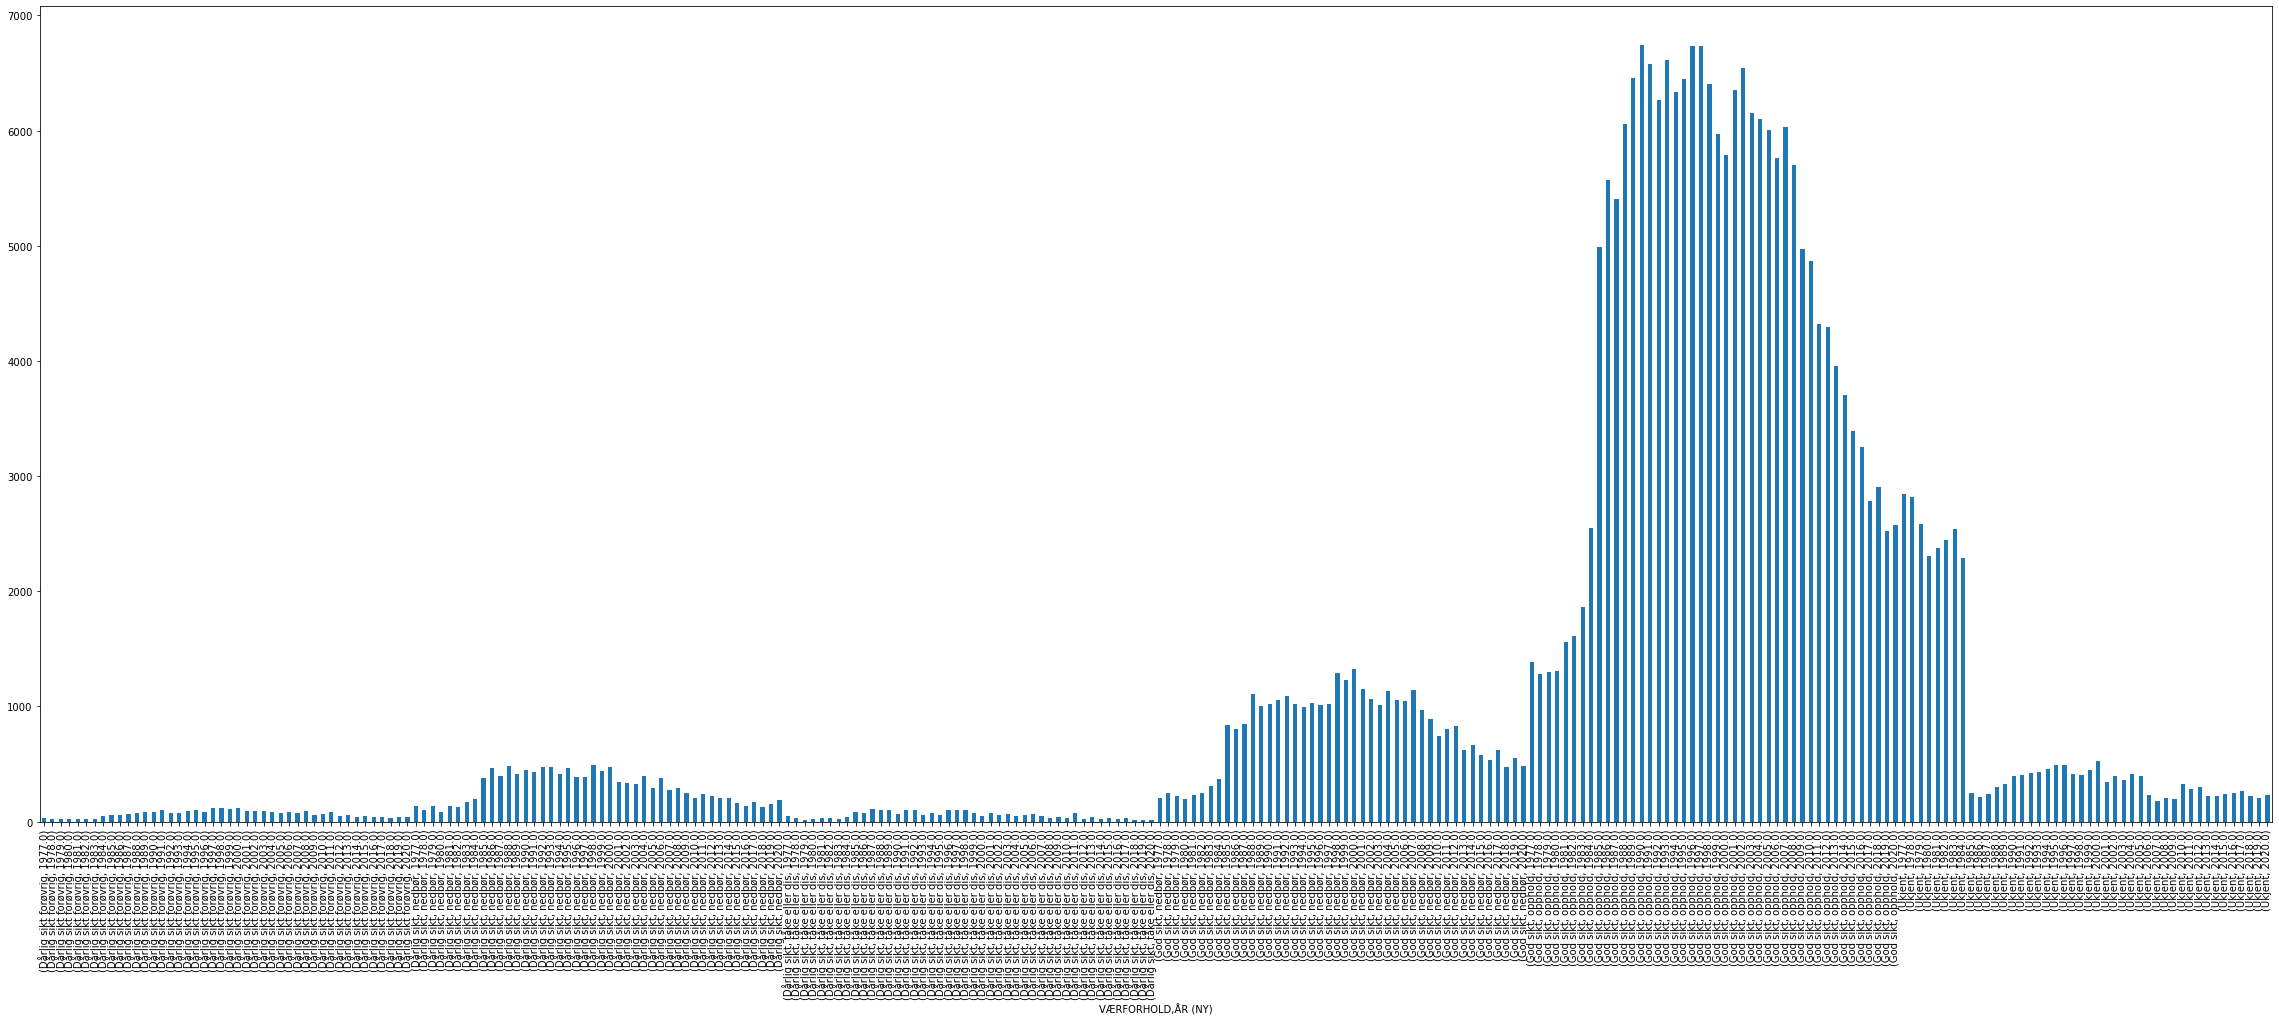

In [16]:
gdf['ÅR (NY)']
gdf_guppert_fartsgrense = gdf.groupby(['VÆRFORHOLD', 'ÅR (NY)'])["VEGOBJEKT-ID"].count()
#Plotter men på logaritmisk skala
gdf_guppert_fartsgrense.plot(kind='bar',figsize=(40,15))


# Ulykker pr kurvatur

In [6]:
import geopandas as gpd
import numpy as np
import nvdbapiv3 as nvdb
from nvdbapiv3 import nvdb2geojson


def get_data_from_vegkart(dataNumber, filterString):
    """Uses NVDB API to load data from SVVs Vegkart into a Geopandas DataFrame.    
    """
    data = nvdb.nvdbFagdata(dataNumber) # Trafikkregistreringsstasjoner
    if filterString != "":
        data.filter({"vegsystemreferanse": filterString})
    data_geo = nvdb2geojson.fagdata2geojson(data)
    df = gpd.GeoDataFrame.from_features(data_geo['features'])
    df.set_crs(epsg=25833)
    return df


#kurve = get_data_from_vegkart(639,"EV6KS148D1M3000")
#kurve["Radius"]#.head()

In [2]:
alleUlykker = get_data_from_vegkart(570,"EV8")
alleUlykker.columns

Index(['geometry', 'Geometri, punkt', 'Regulering gangfelt (Ny)',
       'Regulering vegkryss (Ny)', 'UID (Ny)', 'Ukedagstype (Ny)',
       'Ulykkestype (Ny)', 'Ulykkestype underkategori (Ny)', 'År (Ny)',
       'Antall Andre enheter (Ny)', 'Antall Buss (Ny)',
       'Antall Fotgjengere (Ny)', 'Antall Lastebil (Ny)',
       'Antall Lett MC (Ny)', 'Antall MC (Ny)', 'Antall Moped (Ny)',
       'Antall Personbil (Ny)', 'Antall Skinnegående materiell (Ny)',
       'Antall Sykkel (Ny)', 'Antall Traktor (Ny)',
       'Antall Ukjente enheter (Ny)', 'Antall Varebil (Ny)',
       'ATK, influensstrekning (Ny)', 'Fartsdempende tiltak (Ny)',
       'Vegbelysning (Ny)', 'Historisk Arm (Ny)',
       'Historisk Trafikantgruppe (Ny)', 'Historisk Vegfase (Ny)',
       'Historisk vegstatus', 'Ukedag', 'Ulykkesdato', 'Ulykkesklokkeslett',
       'Ulykkeskode', 'Antall enheter', 'Vegtype', 'Stedsforhold', 'Dekketype',
       'Føreforhold', 'Værforhold', 'Lysforhold', 'Kjørefelttype',
       'Antall kjøref

In [3]:
alleUlykker['kortform'].count()

604

In [4]:
def get_value_from_vegkart(dataNumber, filterString):
    """Uses NVDB API to load data from SVVs Vegkart into a Geopandas DataFrame.    
    """
    data = nvdb.nvdbFagdata(dataNumber) # Trafikkregistreringsstasjoner
    if filterString != "":
        data.filter({"vegsystemreferanse": filterString})
    obj = data.nesteNvdbFagObjekt()
    if obj != None:
        radius = obj.egenskapverdi("Radius")
        return radius
    else:
        return np.NaN

In [60]:
from tqdm.notebook import tqdm, trange

kurveListe = []
for i in tqdm(range(alleUlykker['kortform'].count())): #alleUlykker['kortform'].count():
    kurveListe.append(get_value_from_vegkart(639,alleUlykker['kortform'][i]))

#kurveListe

# hent ut alle kurvatur på e8? :(

  0%|          | 0/604 [00:00<?, ?it/s]

In [8]:
alleUlykker['kortform'][478]

'EV8 S3D1 m1082'

In [9]:
alleUlykker["kurveRadius"] = kurveListe

In [18]:
alleUlykker["kurveRadius"] = alleUlykker["kurveRadius"].abs()

In [66]:
alleUlykker["Ulykkeskode"].unique()

array(['Venstresving foran kjørende i motsatt retning',
       'Fotgjenger krysset kjørebanen forøvrig',
       'Ulykke med uklart forløp / ulykke som ikke faller inn under noen bestemt ul.kode',
       'Enslig kjøretøy kjørte utfor på venstre side i høyrekurve',
       'Møting under forbikjøring av stanset eller parkert kjøretøy',
       'Påkjøring bakfra',
       'Enslig kjøretøy kjørte utfor på høyre side på rett vegstrekning',
       'Ulykke med uklart forløp ved møting',
       'Enslig kjøretøy kjørte utfor på venstre side på rett vegstrekning',
       'Enslig kjøretøy kjørte utfor på høyre side i venstrekurve',
       'Møting på rett vegstrekning',
       'Venstresving foran kjørende i samme retning',
       'Enslig kjøretøy kjørte utfor på venstre side i venstrekurve',
       'Uhell med uklart forløp mellom kjøretøy med samme kjøreretning',
       'Avsvinging i hver sin retning', 'Møting i kurve',
       'Enslig kjøretøy veltet i kjørebanen',
       'Enslig kjøretøy kjørte utfor

In [31]:
# Her lager vi grupper av radiuser basert på N100
bins = [0, 250,275,300,350,400,500,550,600,700,800,900,1000,1200,1400,1600,1750,9998]
names = ['0-200', '250-274','275-299','300-349','350-399','400-499','500-549','550-599','600-699','700-799','800-899','900-999','1000-1199','1200-1399','1400-1599','1600-1749','>1750','rett']
d = dict(enumerate(names, 1))

alleUlykker['Kurve range'] = np.vectorize(d.get)(np.digitize(alleUlykker["kurveRadius"], bins))


In [36]:
alleUlykker.head()

,geometry,"Geometri, punkt",Regulering gangfelt (Ny),Regulering vegkryss (Ny),UID (Ny),Ukedagstype (Ny),Ulykkestype (Ny),Ulykkestype underkategori (Ny),År (Ny),Antall Andre enheter (Ny),...,kryssystem,Stedfestingens nøyaktighet,Midtdeler,sideanlegg,Historisk Meterverdi (Ny),Historisk Vegdelstrekning (Ny),Historisk Vegstrekning (Ny),Vinterdriftsklasse (Ny),kurveRadius,Kurve range
0,POINT Z (655227.282 7732064.665 2.919),POINT (655227 7732064),Ukjent,Ukjent,UID1000177809,Yrkesdøgn,Kryssende kjørereretning,Ulykke ved kryssende kjøreretning hvor kjøretø...,2006,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,482.0,400-499
1,POINT Z (651943.997 7734160.972 10.938),POINT (651944 7734161),Ukjent,Ukjent,UID1000177810,Helgedøgn,Fotgjenger/akende,Fotgjenger krysset kjørebanen,2006,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,776.0,700-799
2,POINT Z (674569.407 7691111.764 98.770),POINT (674570 7691112),Ukjent,Ukjent,UID1000177825,Yrkesdøgn,Andre ulykker,Andre ulykker(parkering o.l),2005,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.0,700-799
3,POINT Z (720165.620 7693538.833 244.729),POINT (720166 7693539),Ukjent,Ukjent,UID1000177833,Yrkesdøgn,Utforkjøring,Enslig kjøretøy kjørte utfor vegen,2005,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,0-200
4,POINT Z (671124.070 7702300.657 3.536),POINT (671124 7702297),Ukjent,Ukjent,UID1000177839,Yrkesdøgn,Motsatt kjøreretning,Ulykke ved møting,2005,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914.0,>1750


<AxesSubplot:ylabel='Frequency'>

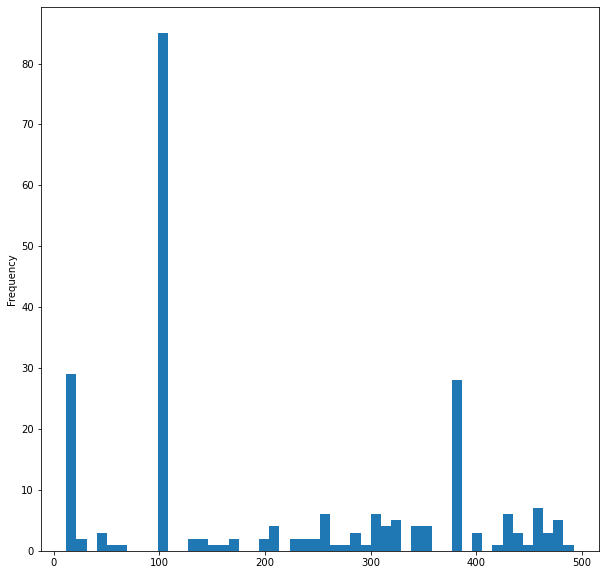

In [21]:
alleUlykker[(alleUlykker["kurveRadius"]<500) & (alleUlykker["kurveRadius"]>-500)]["kurveRadius"].plot(kind="hist", bins=50,figsize=(10,10),by=alleUlykker["id"])

<AxesSubplot:ylabel='Frequency'>

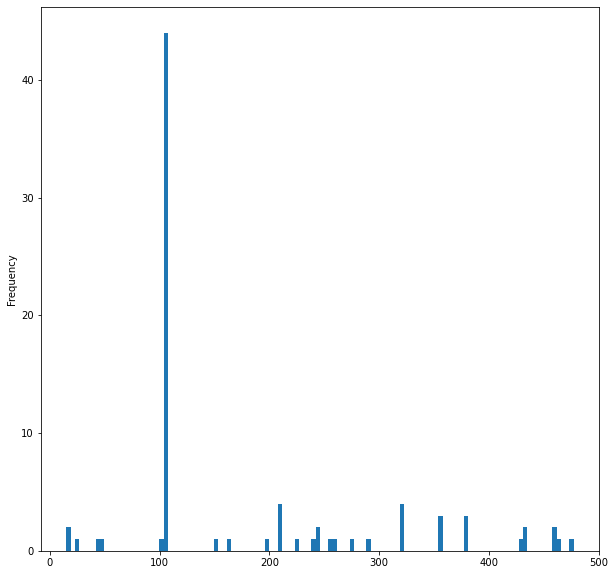

In [26]:
alleUlykker[(alleUlykker["Ulykkestype (Ny)"]=="Utforkjøring") & (alleUlykker["kurveRadius"]<500)]["kurveRadius"].plot(kind="hist", bins=120,figsize=(10,10),by=alleUlykker["id"])

<AxesSubplot:ylabel='Frequency'>

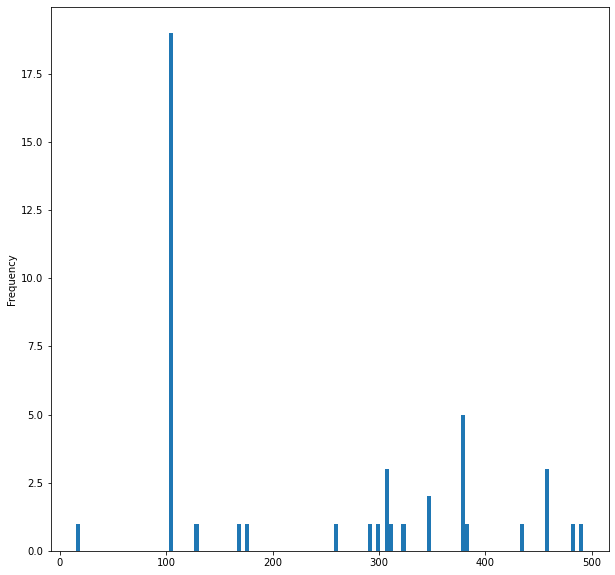

In [28]:
alleUlykker[(alleUlykker["Ulykkestype (Ny)"]=="Motsatt kjøreretning") & (alleUlykker["kurveRadius"]<500)]["kurveRadius"].plot(kind="hist", bins=120,figsize=(10,10),by=alleUlykker["id"])

In [101]:
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
#grupperte_ulykker = alleUlykker.groupby(["Ulykkestype (Ny)", "Kurve range", "ATK, influensstrekning (Ny)"])
#grupperte_ulykker = alleUlykker.groupby(["Ulykkestype (Ny)",  "ATK, influensstrekning (Ny)"])

grupperte_ulykker = alleUlykker.groupby(["Kurve range"])


grupperte_ulykker['UID (Ny)'].count()

Kurve range
0-200        141
1000-1199     43
1200-1399      4
1400-1599     19
1600-1749     14
250-274        7
275-299        5
300-349       19
350-399       35
400-499       27
500-549       15
550-599        9
600-699       15
700-799       23
800-899       10
900-999       14
>1750         18
rett         186
Name: UID (Ny), dtype: int64

In [69]:
pd.crosstab(alleUlykker["Kurve range"], alleUlykker['Lysforhold'])

Lysforhold,Dagslys,Mørkt med vegbelysning,Mørkt uten vegbelysning,"Tussmørke, skumring",Ukjent
Kurve range,,,,,
0-200,77,31,20,6,3
1000-1199,26,7,4,6,0
1200-1399,2,2,0,0,0
1400-1599,12,6,1,0,0
1600-1749,8,4,0,0,0
250-274,3,3,0,1,0
275-299,3,1,0,1,0
300-349,12,4,1,1,0
350-399,18,5,9,3,0


In [110]:
pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
df_kurver = pd.read_csv('../data/639_kurvatur_horisontalelement-eksport.csv', delimiter= ';', decimal = ',')

# Her lager vi grupper av radiuser basert på N100
bins = [0, 250,275,300,350,400,500,550,600,700,800,900,1000,1200,1400,1600,1750,9998]
names = ['0-249', '250-274','275-299','300-349','350-399','400-499','500-549','550-599','600-699','700-799','800-899','900-999','1000-1199','1200-1399','1400-1599','1600-1749','>1750','rett']
d = dict(enumerate(names, 1))

df_kurver["RADIUS (M)"] = df_kurver["RADIUS (M)"].abs()
df_kurver['Kurve range'] = np.vectorize(d.get)(np.digitize(df_kurver["RADIUS (M)"], bins))


df_kurver

,VEGOBJEKT-ID,TYPE-ID,VERSJON,FØRSTE FOREKOMST,STARTDATO,SLUTTDATO,SIST MODIFISERT,BEREGNINGSINFO,"GEOMETRI, HJELPELINJE",KLOTOIDEPARAMETER,...,FRA METER,TIL METER,VEGLENKESEKVENSID,STARTPOSISJON,SLUTTPOSISJON,RETNING,SIDEPOSISJON,TYPEVEG,GEOMETRI,Kurve range
0,323418566,639.0,3.0,1.0,2021-06-23,NaN,2021-06-23T15:51:37,"bd=20120201, kv=7.0.0.50",NaN,NaN,...,10842.186,10847.183,1201967.0,0.999235,1.000000,WITH,NaN,kanalisertVeg,"LINESTRING Z(654369.67 7731108.46 3.9, 654374....",0-249
1,323418567,639.0,3.0,1.0,2021-06-23,NaN,2021-07-01T09:51:53,"bd=20120201, kv=7.0.0.50",NaN,NaN,...,10837.162,10842.186,1201968.0,0.000000,0.002383,WITH,NaN,kanalisertVeg,"LINESTRING Z(654405.86 7731116.26 4.258, 65441...",0-249
2,323418602,639.0,2.0,1.0,2021-06-23,NaN,2021-06-23T15:51:37,"bd=20120201, kv=7.0.0.50",NaN,NaN,...,4263.675,4272.661,1125796.0,0.993534,1.000000,WITH,NaN,enkelBilveg,"LINESTRING Z(655678.938 7733304.255 3.136, 655...",0-249
3,323418603,639.0,3.0,1.0,2021-06-23,NaN,2021-06-23T15:51:37,"bd=20120201, kv=7.0.0.50",NaN,NaN,...,4272.661,4281.103,1125797.0,0.000000,0.003213,WITH,NaN,enkelBilveg,"LINESTRING Z(655686.47 7733315.95 3.19, 655690...",500-549
4,323418618,639.0,2.0,1.0,2021-06-23,NaN,2021-06-23T15:51:37,"bd=20120201, kv=7.0.0.50",NaN,NaN,...,8000.088,8010.125,1125797.0,0.997322,1.000000,WITH,NaN,enkelBilveg,"LINESTRING Z(654360.286 7735223.152 4.607, 654...",300-349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1014473937,639.0,1.0,1.0,2021-12-27,NaN,2021-12-27T14:01:14,"bd=20211227, kv=3.0.0.26, MKM2, ah=0,7",NaN,NaN,...,12634.126,12794.215,2491853.0,0.605987,0.682078,NaN,NaN,enkelBilveg,"LINESTRING Z(715198.321 7695841.221 138.883, 7...",550-599
697,1014473938,639.0,1.0,1.0,2021-12-27,NaN,2021-12-27T14:01:14,"bd=20211227, kv=3.0.0.26, MKM2, ah=0,7",NaN,NaN,...,12504.053,12634.126,2491853.0,0.682078,0.743902,NaN,NaN,enkelBilveg,"LINESTRING Z(715044.373 7695882.079 129.512, 7...",a: rett
698,1014473939,639.0,1.0,1.0,2021-12-27,NaN,2021-12-27T14:01:14,"bd=20211227, kv=3.0.0.26, MKM2, ah=0,7",NaN,NaN,...,6610.562,6695.596,1125791.0,0.249750,0.259273,NaN,NaN,enkelBilveg,"LINESTRING Z(710898.998 7699932.258 66.453, 71...",a: rett
699,1014473940,639.0,1.0,1.0,2021-12-27,NaN,2021-12-27T14:01:14,"bd=20211227, kv=3.0.0.26, MKM2, ah=0,7",NaN,NaN,...,6440.508,6610.562,1125791.0,0.259273,0.278317,NaN,NaN,enkelBilveg,"LINESTRING Z(710836.074 7699989.181 69.891, 71...",500-549


In [104]:
df_kurver['TIL METER'].head(10)

0    10847.183
1    10842.186
2     4272.661
3     4281.103
4     8010.125
5      517.645
6      245.520
7      241.540
8      525.885
9     4122.914
Name: TIL METER, dtype: float64

<AxesSubplot:xlabel='Kurve range'>

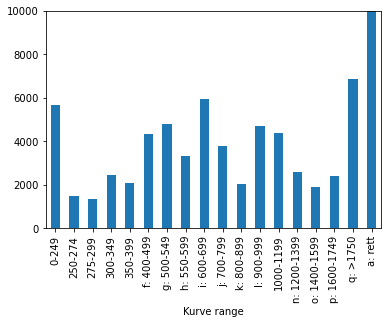

In [107]:
df_kurver['lengde'] = df_kurver['TIL METER'] - df_kurver['FRA METER']
df_kurver['lengde']

df_kurver.groupby(['Kurve range'])['lengde'].sum().loc[names].plot(kind='bar', ylim=(0,10000))